# Séries temporais

Versão: 23.11.2021

*** 
Este notebook é baseado no trabalho de conclusão do curso intitulado X e serve como um suporte para a compreensão dos conceitos apresentados no trabalho.
***

## O que é uma série temporal?

***
Qualquer conjunto de observações __ordenadas__ no tempo. 


Podemos definí-la como a realização particular de um processo estocástico, ou seja, trata-se de um conjunto de todas as possíveis trajetórias que se pode observar.
Cada curva formada por uma séries recebe o nome de trajetória do processo físico e o que chamamos de série temporal é uma parte da trajetória.

Cada curva formada por uma séries recebe o nome de trajetória do processo físico e o que chamamos de série temporal é uma parte da trajetória.
***

## Exemplos de séries temporais
***

As séries temporais podem ser __discretas__, ou seja, as observações são obtidas em intervalos de tempo discretos e equidistantes.


Vamos ler o arquivo que contém os valores de bits feitos via canal de internet do Hospital das Clínicas, realizados em um mes. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 3100)
bits = pd.read_csv('./Arquivo CSV/PACS01 - Trafego Out VDX PACS01_To_CORE02.csv', index_col=[0],parse_dates=True,squeeze=True)
bits.head(20)

time
2021-09-02 14:11:03     93976728
2021-09-02 14:12:03    163203744
2021-09-02 14:12:33     89591192
2021-09-02 14:13:03    151828552
2021-09-02 14:13:33     95153912
2021-09-02 14:14:03     70406728
2021-09-02 14:14:33     57658640
2021-09-02 14:15:03     42912072
2021-09-02 14:15:33    111112416
2021-09-02 14:16:03     93770688
2021-09-02 14:16:34    135585128
2021-09-02 14:17:33    173045400
2021-09-02 14:18:04    166503912
2021-09-02 14:18:33    107718936
2021-09-02 14:19:03    135713472
2021-09-02 14:19:33    137099304
2021-09-02 14:20:03    149965696
2021-09-02 14:20:33     88808536
2021-09-02 14:21:33    125315360
2021-09-02 14:22:03     91075176
Name: bits, dtype: int64

Vamos converter a coluna "time" inicialmente em um objeto `datetime`; em seguida, vamos convertê-lo em um __índice__. Portanto, o tempo passa a ser um indicador de valor da série. Isto estabelece uma série temporal dentro da linguagem Python.

In [2]:
import datetime


def conversor(strdate):
    #objdate = datetime.datetime.strptime(strdate,'%Y-%m-%dT%H:%M:%S%z')
    objdate = datetime.datetime.strptime(strdate,'%Y-%m-%d %H:%M:%S')
    return objdate
# 'time' column converted to object datetime
PACS= pd.read_csv('./Arquivo CSV/PACS01 - Trafego Out VDX PACS01_To_CORE02.csv', sep=",")
PACS['time'] = PACS['time'].map(lambda value: conversor(value))
# 'time' is defined as a index
PACS = PACS.set_index('time')

<AxesSubplot:xlabel='time'>

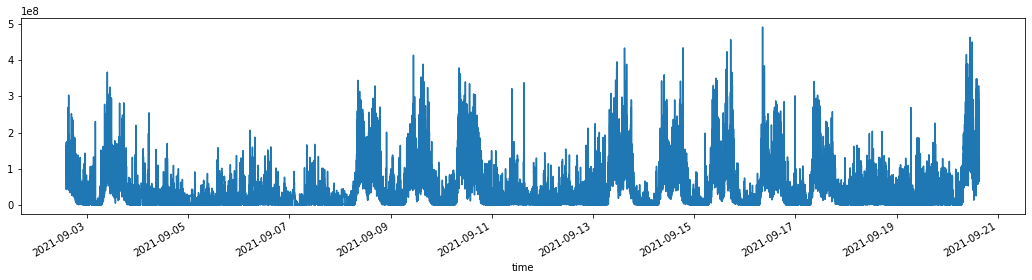

In [3]:
bits.plot(figsize=(18,4))
# Ocorrerá um warning para algumas situações, mas não precisa se preocupar com isto.

In [4]:
bits.describe()

count    5.000000e+04
mean     4.007341e+07
std      5.654302e+07
min      2.152880e+05
25%      2.760058e+06
50%      1.351142e+07
75%      5.655816e+07
max      4.903373e+08
Name: bits, dtype: float64

Um outro gráfico que pode ser feito é o chamado *boxplot*, muito útil para avaliar qual é a mediana em um dado intervalo de tempo, os valores mínimos e máximos, os quartis e os *outliers*, ou seja, valores muito fora da mediana.

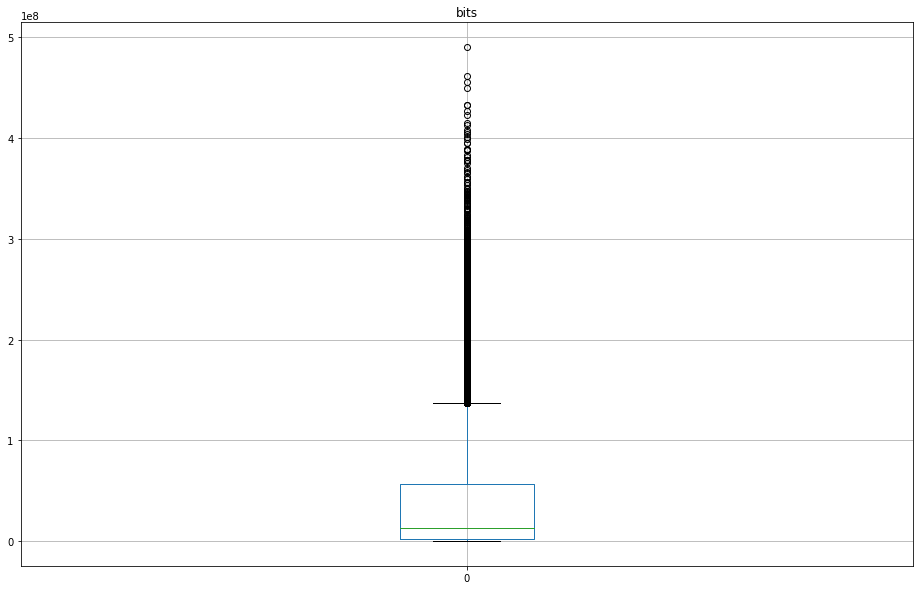

In [5]:
from pandas import Grouper
from pandas import concat
from pandas import DataFrame
# Grouper(freq='M') groups the data by month.
y = bits.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in y], axis=1)
months = DataFrame(months)
# This number (13) could be represent the quantity of months.
#months.columns = range(14)
months.boxplot(figsize=(16,10))
plt.title("bits")
plt.show()

As medianas são dadas pelas linhas verdes, as 'caixas' são os quartis, os traços são o mínimo e o máximo e os pontos são os *outliers*. Para aprender um pouco mais sobre a interpretação dos gráficos de *boxplots*, recomenda-se o seguinte *site*: https://operdata.com.br/blog/como-interpretar-um-boxplot/ 


As séries também podem ser __contínuas__, como é o caso dos resultados de eletrocardiograma ou de encefalograma.
<br>
![Imagem de Traces-ECG](https://www.dispomed.com/wp-content/uploads/2015/05/traces-ECG.jpg)
<br>
`https://www.dispomed.com/electrocardiogram-ecg/`

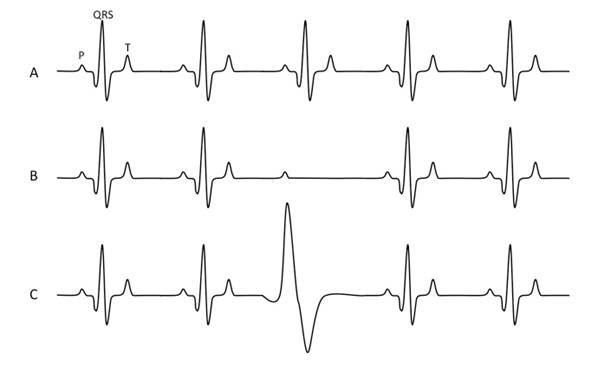

Muitas vezes uma série temporal discreta pode ser obtida por meio da **amostragem** de uma série contínua, realizada em intervalos de tempos iguais $ \Delta t$. Assim, em um dado período de tempo $[0,T]$, pode-se obter uma série discreta com $N$ pontos, sendo que $N=\frac{T}{\Delta t}$.
***

## O que é uma média móvel ##

***
**Médias móveis** são comumente usadas em séries temporais com o objetivo de suavizar flutuações curtas e destacar tendências de longo prazo, dependendo da aplicação necessária. Uma média móvel é um estimador calculado a partir de amostras sequenciais da população.
***

### Média móvel simples (SMA - Single Moving Average) ###

***
Considere a série temporal dada por: $$ {x_0,\, x_1,\,\ldots,\, x_{t-1},\,x_{t},\, x_{t+1},\,\ldots} $$

Vamos considerar uma média móvel simples com janela 3, ou seja, vamos calcular as médias a partir de 3 valores, como se mostra a seguir. A primeira média $m_{0}$ é dada por: $$m_{0}=\frac{x_{0}+x_{1}+x_{2}}{3};$$

a próxima é dada por: $$m_{1}=\frac{x_{1}+x_{2}+x_{3}}{3};$$

em seguida, $$m_{2}=\frac{x_{2}+x_{3}+x_{4}}{3}$$

e continua assim por diante: $$m_{t}=\frac{x_{t}+x_{t+1}+x_{t+2}}{3}.$$


No caso da série `bits`, vamos montar uma média móvel com janela de 24 valores, ou seja, equivalente à média de 3 dias de tráfego, já que estes valores são obtidos de 3 em 3 horas. Seguem as funções da biblioteca `Pandas` do Python para fazer uma cópia da série e nela montar uma nova coluna `SMA24` com os valores da média móvel simples.

In [6]:
bitsext = PACS
PACS['SMA24'] = PACS.rolling(48, min_periods=1).mean()

A seguir, vamos colocar em um gráfico ambas as séries,`bits` e `SMA24`, no tempo, usando as funções abaixo.

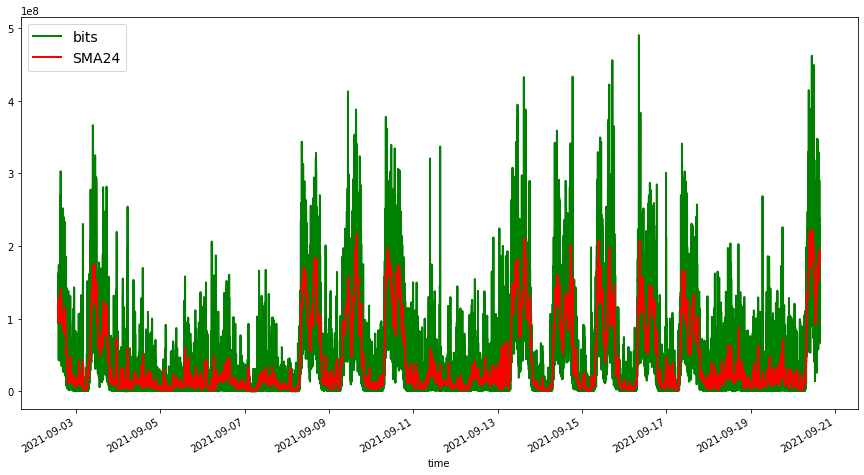

In [7]:
colors = ['green','red']
bitsext.plot(color=colors, linewidth=2, figsize=(15,8))
plt.legend(labels=['bits','SMA24'], fontsize=14)

Observe que a curva da média móvel (`SMA24`) suaviza a curva da série principal, mostrando uma tendência.

***
## Autocorrelação ##

***
A autocorrelação é a **correlação cruzada** de um sinal (ou série) com ele **próprio**, é uma medida que informa o quanto uma variável aleatória é capaz de influenciar seus vizinhos. Abaixo temos a gráfico da autocorrelação da série `bits`.
***

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

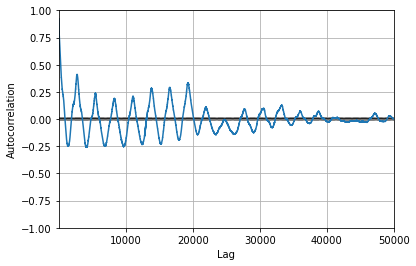

In [8]:
pd.plotting.autocorrelation_plot(PACS)

## Séries estacionárias ##

***
![Piada](https://images.squarespace-cdn.com/content/v1/5967b457f5e231989e7ec70c/1501183322745-28SBYUCSRB8BEEOFH34B/phd081310s.gif)
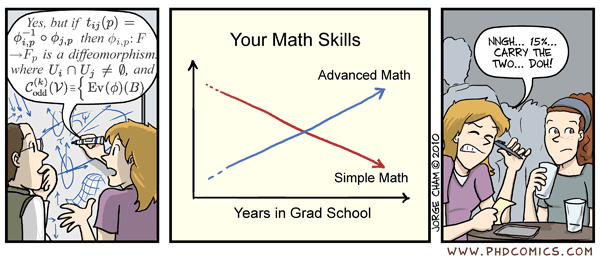

Uma **série estacionária** é uma série que se desenvolve aleatoriamente no tempo ao redor de uma média constante, refletindo alguma forma de equilíbrio estável. É a suposição mais frequente que se faz a respeito de uma série temporal.

A maioria dos procedimentos de análise estatística de séries temporais supõe que estas sejam estacionárias. Assim, caso isso não ocorra, será necessário transformar os dados originais por meio de diferenças sucessivas da série original, até obter uma série estacionária. De forma geral, basta encontrar até a segunda diferença para que a série se torne estacionária.

A série "bits" é ​​estacionária e possui uma descrição, sendo detalhado no teste Dickey-Fuller abaixo.

***
## Teste de Dickey-Fuller aumentado (augmented Dickey-Fuller test) ##

***
Este teste foi desenvolvido por esta dupla de professores, Mr. *David Alan Dickey* e Mr. *Wayne Arthur Fuller*. 

![D.A. Dickey](https://alchetron.com/cdn/david-dickey-0e346d83-43db-4679-b68a-751055d4233-resize-750.jpeg)
<br>
D.A. Dickey
<br>
![W.A. Fuller](https://www.researchgate.net/profile/Carlos-Mejia-26/publication/323621535/figure/fig2/AS:670200936534025@1536799763368/Professor-Wayne-Fuller.jpg) 
<br>
W.A. Fuller
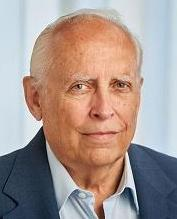
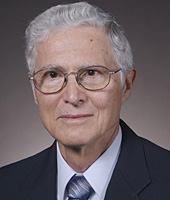

Basicamente, o teste averigua se as variáveis envolvidas em uma série possui uma raiz unitária. Caso possua, média e variância não são constantes e, assim, a série não é estacionária.

A hipótese nula é que $H_{0}=$ {*Existe pelo menos uma raiz e a série não é estacionária*}.

Veja o código abaixo e a interpretação dos resultados.

In [9]:
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.5)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = int(model_fit.forecast()[0][0])
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse, predictions

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse, prediction = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        best_order = order
                    print('\n ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE = %.3f' % (best_cfg, best_score))
    return best_order, prediction
"""
p_values = [0, 1, 2, 3, 4, 5]
d_values = range(0, 5)
q_values = range(0, 5)
p_values = [0, 1]
d_values = range(0, 1)
q_values = range(0, 1)
"""
p_values = [0, 1, 2, 3, 4, 5]
d_values = range(0, 3)
q_values = range(0, 5)
# evaluate parameters
warnings.filterwarnings("ignore")
PACS = read_csv('./Arquivo CSV/PACS01 - Trafego Out VDX PACS01_To_CORE02.csv',sep=',', index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
warnings.filterwarnings("ignore")
best_order, prediction = evaluate_models(PACS.values, p_values, d_values, q_values)
prediction


 ARIMA(0, 0, 0) RMSE=61196277.066

 ARIMA(1, 0, 0) RMSE=51708077.943
Best ARIMA (1, 0, 0) RMSE = 51708077.943


[81221115, 38760502, 102210453, 60876291, 41573433]

Os resultados acima são o *p-value*. e os resultados são os valores críticos referentes respectivamente aos valores dos intervalos de confiança p=1%, 5%, 10%. da série.

Compare cada um dos valores acima com resultado do valor crítico obtido. Note que o todos valores mostram que o série temporal é estacionária, pois os valores T estão acima do valor crítico.
***

## Modelo ARIMA ##

***
Este modelo para análise e previsão de séries temporais é o mais utilizado atualmente. Serve tanto para as séries estacionárias como para as não-estacionárias, desde que não ocorra comportamento explosivo. 

**ARIMA** significa **Auto Regression**-**Integrate**-**Moving Average**, ou seja, modelo autoregressivo integrado com médias móveis. 

Na apostila elaborada pela Profa. Clarice Pachi, há a teoria referente a este modelo. Neste notebook, vamos mostrar uma implantação em Python do ARIMA a partir da publicação do Jason Brownlee, *Introduction to time series forecasting with Python*, distribuída no *site* https://machinelearningmastery.com/.


Para montar um modelo ARIMA, são necessários 3 parâmetros: $p,d,q$, onde $p$ representa a ordem de autoregressão __(AR)__, $d$ é o valor da integração __(I)__ e $q$ é a ordem de média móvel __(MA)__: $$ ARIMA(p,d,q). $$

A análise que precisa ser feita para encontrar os valores adequados de $(p,d,q)$ não é trivial e exige paciência. Uma maneira interessante de encontrar os valores é, inicialmente, definir um conjunto de valores para cada um dos parâmetros, por exemplo:

$$\begin{cases}
p= & \left\{ n_{i}\right\} _{i=0,\ldots n_{p}}\\
d= & \left\{ m_{j}\right\} _{j=0,\ldots m_{d}}\\
q= & \left\{ s_{k}\right\} _{k=0,\ldots s_{q}}
\end{cases}$$
sendo que $\left\{ n_{i}\right\} ,\left\{ m_{j}\right\} ,\left\{ s_{k}\right\} \in\mathbb{N}$, isto é, são números naturais.

Considere a série que está sendo analisada, que pode ser denotada por:$$\left\{ x_{t}\right\} _{t=0,\ldots,T}=x_{0},x_{1},\ldots,x_{T-1},x_{T}$$

Divida esta série em dois grupos, os primeiros $\frac{2}{3}$ elementos em um grupo e o restante, $\frac{1}{3}$, em outro grupo.

O primeiro grupo pode ser chamado de `history` e o segundo, `test`. 

Considere agora um conjunto de valores $(p,d,q)=(1,1,1)$, por exemplo. O modelo é montado a partir dos dados do grupo `history` com o conjunto de parâmetros. 

Em seguida, é possível __prever__ qual seria a sequência da série, ou seja, monta-se um novo conjunto denominado `predictions`.

Após ter calculado a série `predictions`, compare-a com a série `test`, e veja o quanto há de erro na previsão dos valores por meio de uma fórmula denominada *Root Median Square Error (RMSE)* (raiz do erro médio quadrático), dado por:

$$RMSE(\mathbf{x},\mathbf{y})=\frac{1}{\tau}\sqrt{\sum_{t=0}^{\tau}\left(x_{t}-y_{t}\right)^{2}}$$
onde $\mathbf{x}$ é a série `test` e $\mathbf{y}$, a série `predictions`.
***

## Preparação dos dados ##
***

Acima foi preparado uma base de dados para que seja possivel treinar a IA com uma parcela dos dados.

## Compilando o modelo ARIMA e realizando previsões com ARIMA ##
***

> O programa a seguir é lento, aguarde os resultados para as previsões e os dados gerados pela aplicação

In [10]:
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.9999)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = int(model_fit.forecast()[0][0])
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse, predictions

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse, prediction = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        best_order = order
                    print('\n ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE = %.3f' % (best_cfg, best_score))
    return best_order, prediction
"""
p_values = [0, 1, 2, 3, 4, 5]
d_values = range(0, 5)
q_values = range(0, 5)
p_values = [0, 1]
d_values = range(0, 1)
q_values = range(0, 1)
"""
p_values = [0, 1]
d_values = range(0, 1)
q_values = range(0, 1)
warnings.filterwarnings("ignore")
PACS = read_csv('./Arquivo CSV/PACS01 - Trafego Out VDX PACS01_To_CORE02.csv',sep=',', index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
warnings.filterwarnings("ignore")
best_order, prediction = evaluate_models(PACS.values, p_values, d_values, q_values)
prediction


 ARIMA(0, 0, 0) RMSE=69089983.231

 ARIMA(1, 0, 0) RMSE=32584676.198
Best ARIMA (1, 0, 0) RMSE = 32584676.198


[116985677, 129106929, 91084678, 62535916, 74357306]

O programa é lento pois precisa fazer 8 combinações de $(p,d,q)$ em cima de mais de 45000 dados! Algumas combinações são desconsideradas, como $(1,1,1)$. O modelo determinado, portanto, é o ARIMA(1,0,0) neste sistema de *machine learning*, denominado *grid search* ou *model tuning*. 

Algumas observações a serem feitas:

1. Os parâmetros $(p,d,q)$ estão transcritos na variável `arimaorder` como um tupla;
***

## Visualizando predições ##
***

A partir do ARIMA acima, vamos ilustrar o processo com o Plot.

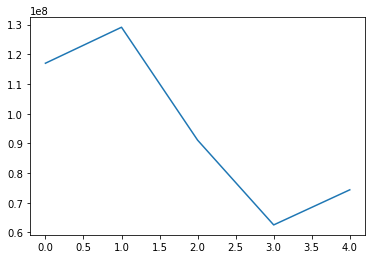

In [11]:
from matplotlib import pyplot
pyplot.plot(prediction)